In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "../ZZ_Data/cars.csv"

### First read: get all columns
dfCol = pd.read_csv(filename, nrows = 3)
colNames = list(dfCol.columns.values)
print("All Columns: ", colNames)

xValue = colNames[1]
yValue = colNames[7]
print("xValue: ", xValue, " yValue: ", yValue)


colsIwannaUse = [xValue, yValue, "Origin"]
df = pd.read_csv(filename, usecols = colsIwannaUse, nrows = 3000)
# df = df.sort_values(by=[xValue])

# df = df.groupby([xValue]).mean()
print(df.head(3))
print(df.tail(3))

All Columns:  ['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration', 'Year', 'Origin']
xValue:  Miles_per_Gallon  yValue:  Year
   Miles_per_Gallon        Year Origin
0              18.0  1970-01-01    USA
1              15.0  1970-01-01    USA
2              18.0  1970-01-01    USA
     Miles_per_Gallon        Year Origin
403              32.0  1982-01-01    USA
404              28.0  1982-01-01    USA
405              31.0  1982-01-01    USA


          Year       index  Miles_per_Gallon
0   1970-01-01   24.166667         25.200000
1   1971-01-01   55.000000         28.750000
2   1972-01-01   80.800000         22.000000
3   1973-01-01  123.000000         24.000000
4   1974-01-01  152.333333         27.000000
5   1975-01-01  183.833333         24.500000
6   1976-01-01  204.250000         24.250000
7   1977-01-01  240.250000         29.250000
8   1978-01-01  277.666667         24.950000
9   1979-01-01  305.250000         30.450000
10  1980-01-01  332.444444         37.288889
11  1982-01-01  372.428571         34.383333


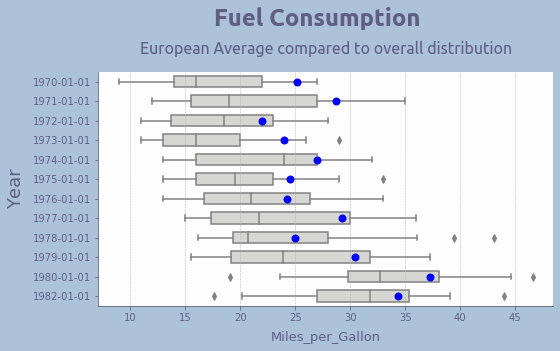

In [3]:

########################################################################################################
###    Plot
########################################################################################################

### Create the figure and the graph (=axis) with the figure
fig, ax = plt.subplots(figsize=(8, 5))

myColor1 = "#605f82"
fig.suptitle("Fuel Consumption", fontsize=24, fontweight=800,
    verticalalignment="top", color=myColor1, fontfamily="Ubuntu"
)

### Colors and spacings
fig.set_facecolor('xkcd:cloudy blue')
ax.set_facecolor('xkcd:pale grey')
plt.subplots_adjust(left=0.12, right=0.91, top=0.80, bottom=0.15)
ax.xaxis.grid(linestyle="--", linewidth=0.5)
ax.yaxis.grid(linestyle="--", linewidth=0.5)

### Set title and configure axis
ax.set_title("European Average compared to overall distribution", fontsize=16, \
    fontweight=400, pad = 18, color=myColor1, fontfamily="Ubuntu")

ax.set_xlabel(xlabel = xValue, fontsize=13, color=myColor1, labelpad = 8)
ax.set_ylabel(ylabel = yValue, fontsize=18, color=myColor1, labelpad = 8)

### Beautifications
ax.tick_params(axis='x', colors=myColor1, rotation=0)
ax.tick_params(axis='y', colors=myColor1)

ax.spines['bottom'].set_color(myColor1)
ax.spines['left'].set_color(myColor1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Boxplog
df = df.reset_index()
sns.boxplot(x=xValue, y=yValue, data=df, orient="h",
            whis=1, fliersize=5, width=.6, palette=["#d6d7d3"])

dfEU = df.loc[df.Origin == "Europe"]
dfEU = dfEU.groupby(yValue).mean()
dfEU = dfEU.reset_index(drop=False)
print(dfEU)
# exit()

### Add in points to show each observation
sns.stripplot(x=xValue, y=yValue, data=dfEU,
              size=8, color="b", linewidth=0, jitter=0) 